# Fake News Detection

## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [6]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4



[notice] A new release of pip is available: 24.1.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
! pip install plotly

   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
    --------------------------------------- 0.2/16.3 MB 4.8 MB/s eta 0:00:04
   - -------------------------------------- 0.7/16.3 MB 7.0 MB/s eta 0:00:03
   -- ------------------------------------- 1.2/16.3 MB 8.3 MB/s eta 0:00:02
   --- ------------------------------------ 1.6/16.3 MB 8.6 MB/s eta 0:00:02
   ----- ---------------------------------- 2.0/16.3 MB 8.7 MB/s eta 0:00:02
   ------ --------------------------------- 2.5/16.3 MB 8.9 MB/s eta 0:00:02
   ------- -------------------------------- 3.0/16.3 MB 9.2 MB/s eta 0:00:02
   -------- ------------------------------- 3.5/16.3 MB 9.7 MB/s eta 0:00:02
   ---------- ----------------------------- 4.1/16.3 MB 9.8 MB/s eta 0:00:02
   ----------- ---------------------------- 4.8/16.3 MB 10.2 MB/s eta 0:00:02
   ------------ --------------------------- 5.1/16.3 MB 9.9 MB/s eta 0:00:02
   -------------- ------------------------- 5.7/16.3 MB 10.1 MB/s eta 0:00:02
   -


[notice] A new release of pip is available: 24.1.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install --upgrade spacy==3.7.5
!python -m spacy download en_core_web_sm

  Using cached spacy-3.7.5-cp39-cp39-win_amd64.whl.metadata (27 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.13-cp39-cp39-win_amd64.whl.metadata (2.2 kB)
  Using cached cymem-2.0.11-cp39-cp39-win_amd64.whl.metadata (8.8 kB)
  Using cached preshed-3.0.10-cp39-cp39-win_amd64.whl.metadata (2.5 kB)
  Using cached thinc-8.2.5-cp39-cp39-win_amd64.whl.metadata (15 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.5.1-cp39-cp39-win_amd64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer-0.16.0-py3-none-any.whl.metadata (15 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached blis-0.7.11-cp39-cp39-win_amd64.w


[notice] A new release of pip is available: 24.1.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 4.3 MB/s eta 0:00:03
     - -------------------------------------- 0.6/12.8 MB 7.6 MB/s eta 0:00:02
     ---- ----------------------------------- 1.5/12.8 MB 11.6 MB/s eta 0:00:01
     ------- -------------------------------- 2.3/12.8 MB 12.3 MB/s eta 0:00:01
     ----------- ---------------------------- 3.6/12.8 MB 15.5 MB/s eta 0:00:01
     ------------- -------------------------- 4.3/12.8 MB 16.3 MB/s eta 0:00:01
     ------------------ --------------------- 5.8/12.8 MB 18.5 MB/s eta 0:00:01
     --------------------- ------------------ 6.9/12.8 MB 19.1 MB/s eta 0:00:01
     --------------------- ------------------ 7.0/12.8 MB 16.6 MB/s eta 0:00:01
     ------------------------- -------------- 8.3/12.8 MB 17.7 MB/s eta 0:00:01
     ------------------------------ --------- 9.7/12.8 MB 18.8 MB/s eta 0:00:01
     -------------------------------- ------ 10.7/


[notice] A new release of pip is available: 24.1.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importing the necessary libraries

In [3]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations
import os

In [3]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [218]:
# Import the first file - True.csv

true_news = pd.read_csv('True.csv', header = 0,encoding= 'utf-8')
# Import the second file - Fake.csv
fake_news = pd.read_csv('Fake.csv', header = 0,encoding= 'utf-8')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [219]:
# Inspect the DataFrame with True News to understand the given data
true_news.sample(10)

,title,text,date
8899,U.S. attorney general to accept FBI findings i...,WASHINGTON (Reuters) - U.S. Attorney General L...,"July 1, 2016"
15591,Lebanon president says stability is 'red line'...,BEIRUT (Reuters) - Lebanon s president stresse...,"November 6, 2017"
14683,"Russian, Lebanese foreign ministers to meet in...",MOSCOW (Reuters) - Russian Foreign Minister Se...,"November 16, 2017"
8375,"Clinton, Trump clash over who is best for U.S....","RENO, Nev./MANCHESTER, N.H. (Reuters) - Democr...","August 25, 2016"
2814,Senate may vote on revised healthcare bill nex...,WASHINGTON (Reuters) - U.S. Senate Republicans...,"July 11, 2017"
5172,Democrat Franken says Sessions 'extremely misl...,WASHINGTON (Reuters) - Democratic Senator Al F...,"March 2, 2017"
3561,FBI director search: back to drawing board for...,(This version of the May 24 story corrects pa...,"May 24, 2017"
4177,"Defense, finance, telecoms donated heavily to ...",WASHINGTON (Reuters) - Large U.S. companies an...,"April 20, 2017"
10562,Republican Romney to make 'major speech' on 20...,WASHINGTON (Reuters) - Former Republican presi...,"March 2, 2016"
10346,Obama administration reverses course on Atlant...,WASHINGTON (Reuters) - The Obama administratio...,"March 15, 2016"


In [220]:
# Inspect the DataFrame with Fake News to understand the given data
fake_news.sample(10)

,title,text,date
20230,"PRIORITIES: AS VETS LAY DYING, WAITING For Med...",Is it any wonder veterans are getting behind D...,"Jul 26, 2016"
16727,CLIMATE CHANGE DENIERS BEWARE: The DOJ Wants T...,"In a shocking exchange on Wednesday, Attorney ...","Mar 10, 2016"
9553,HARVEY WEINSTEIN RAPE ACCUSER Has Warrant Issu...,Was the first actress who outed accused rapist...,"Oct 31, 2017"
13941,BERNIE’S WORLD: SOCIALISM Forces Venezuelans t...,Take a good hard look America this is Bernie s...,"May 10, 2016"
3413,Trump Advisor’s Stupidity Makes CNN Host EXPL...,"This morning, CNN host Chris Cuomo found himse...","December 14, 2016"
11043,Joe Scarborough BERATES Mika Brzezinski Over “...,,"Apr 26, 2017"
14135,WHY THIS REPUBLICAN GOVERNOR Is Being Called “...,Watch this video and you ll see why this man i...,"Apr 12, 2016"
3434,Veterans: Cozy Trump Relationship With Russia...,Military veterans are expressing extreme conce...,"December 12, 2016"
21925,ENTITLED IRS ETHICS LAWYER DISBARRED FOR ETHIC...,Don t you just love an entitled IRS lawyer who...,"Apr 4, 2015"
15724,(VIDEO) CLINTON FOUNDATION HOSTS FUNDRAISERS ‘...,,"May 10, 2015"


In [11]:
# Print the column details for True News DataFrame
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       21417 non-null  object
 1   text        21417 non-null  object
 2   date        21417 non-null  object
 3   news_label  21417 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 669.4+ KB


In [12]:
# Print the column details for Fake News Dataframe
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       23502 non-null  object
 1   text        23502 non-null  object
 2   date        23481 non-null  object
 3   news_label  23523 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 735.2+ KB


In [9]:
# Print the column names of both DataFrames
print("The true NEWS columns are", true_news.columns)
print("The fake NEWS columns are", fake_news.columns)

The true NEWS columns are Index(['title', 'text', 'date'], dtype='object')
The fake NEWS columns are Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [221]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_news['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_news['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [222]:
# Combine the true and fake news DataFrames into a single DataFrame
news = pd.concat([true_news, fake_news], axis =  0)

In [223]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44940 entries, 0 to 23522
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44919 non-null  object
 1   text        44919 non-null  object
 2   date        44898 non-null  object
 3   news_label  44940 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [224]:
# Display the first 5 rows of the combined DataFrame to verify the result
news.iloc[0:5]

,title,text,date,news_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [225]:
# Check Presence of Null Values
news.isna().sum()

title         21
text          21
date          42
news_label     0
dtype: int64

In [226]:
# Handle Rows with Null Values
news.dropna(axis = 0, inplace = True)

In [227]:
print("The total null values",news.isna().sum())
#all null values are taken care of

The total null values title         0
text          0
date          0
news_label    0
dtype: int64


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [229]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
news['news_text'] =  news['title'].str.cat(news['text'], sep=' : ')
# Drop the irrelevant columns from the DataFrame as they are no longer needed

news = news.drop(columns = ['title', 'text', 'date'] , axis =1)
# Display the first 5 rows of the updated DataFrame to check the result
news.head()

,news_label,news_text
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


In [230]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 23522
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   news_label  44898 non-null  int64 
 1   news_text   44898 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [242]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed

#Step1 : lower case

df_clean = pd.DataFrame()

#Step2
# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = news['news_label']

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [243]:
# Write the function here to clean the text and remove all the unnecessary elements

import re
def clean_up (text):

    # Convert to lower case

    cleaned_text = text.lower()
    
# Remove text in square brackets
    pattern1 = r'\[.*?\]'
    cleaned_text = re.sub(pattern1, "", cleaned_text)
# Remove punctuation
    pattern2  = f"[{re.escape(string.punctuation)}]" 
    cleaned_text = re.sub(pattern2, "", cleaned_text)
# Remove words with numbers

# Pattern: words that contain at least one letter and at least one digit
    pattern3 = r"\b(?=\w*[A-Za-z])(?=\w*\d)\w+\b"
    cleaned_text = re.sub(pattern3, "", cleaned_text)

    return cleaned_text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [244]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 23522
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   news_label  44898 non-null  int64
dtypes: int64(1)
memory usage: 701.5 KB


In [245]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame

df_clean['news_text'] = news['news_text'].apply(clean_up)

In [246]:
df_clean.head()

,news_label,news_text
0,1,as us budget fight looms republicans flip thei...
1,1,us military to accept transgender recruits on ...
2,1,senior us republican senator let mr mueller do...
3,1,fbi russia probe helped by australian diplomat...
4,1,trump wants postal service to charge much more...


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [239]:
import spacy

# Load a language model
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words

In [247]:
def pos_tag(doc):
    tokens = nlp(doc['news_text'])
    # only words with NN & NNS tags and are not stop words
    clean_text = " ".join ([token.text for token in tokens if ((token.tag_ in ['NN', 'NNS']) & (token.text not in stop_words)) ])
    lemma_text = " ".join ([token.lemma_ for token in tokens if ((token.tag_ in ['NN', 'NNS']) & (token.text not in stop_words)) ])
    return  [clean_text, lemma_text]
     

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [248]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame

df_clean[['clean_text','lemma_text']]  = df_clean.apply(pos_tag, axis = 1, result_type = 'expand')

In [250]:
df_clean.head()

,news_label,news_text,clean_text,lemma_text
0,1,as us budget fight looms republicans flip thei...,budget fight script head faction month expansi...,budget fight script head faction month expansi...
1,1,us military to accept transgender recruits on ...,military transgender recruits people time mili...,military transgender recruit people time milit...
2,1,senior us republican senator let mr mueller do...,mueller job counsel investigation links electi...,mueller job counsel investigation link electio...
3,1,fbi russia probe helped by australian diplomat...,probe diplomat trump campaign adviser diplomat...,probe diplomat trump campaign adviser diplomat...
4,1,trump wants postal service to charge much more...,trump service shipments service ship packages ...,trump service shipment service ship package am...


### Save the Cleaned data as a csv file (Recommended)

In [251]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)

In [252]:
# Check the first few rows of the DataFrame
df_clean = pd.read_csv("clean_df.csv")
df_clean.head()

,news_label,news_text,clean_text,lemma_text
0,1,as us budget fight looms republicans flip thei...,budget fight script head faction month expansi...,budget fight script head faction month expansi...
1,1,us military to accept transgender recruits on ...,military transgender recruits people time mili...,military transgender recruit people time milit...
2,1,senior us republican senator let mr mueller do...,mueller job counsel investigation links electi...,mueller job counsel investigation link electio...
3,1,fbi russia probe helped by australian diplomat...,probe diplomat trump campaign adviser diplomat...,probe diplomat trump campaign adviser diplomat...
4,1,trump wants postal service to charge much more...,trump service shipments service ship packages ...,trump service shipment service ship package am...


In [253]:
# Check the dimensions of the DataFrame
df_clean.shape

(44898, 4)

In [254]:
# Check the number of non-null entries and data types of each column
df_clean.isna().sum()

news_label     0
news_text      0
clean_text    17
lemma_text    17
dtype: int64

In [256]:
df_clean.news_label.value_counts()

#good balance of fake & true news.

news_label
0    23481
1    21417
Name: count, dtype: int64

## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [257]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
import sklearn
from sklearn.model_selection  import train_test_split

#X = df_clean.iloc[:,1:]
#y= df_clean.iloc[:,0]
train_set, test_set = train_test_split(df_clean, test_size = .3, random_state = 42, shuffle = True, stratify= df_clean['news_label'])
print(train_set.shape[0], 'train samples')
print(test_set.shape[0], 'test samples')

31428 train samples
13470 test samples


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [258]:
# Add a new column to calculate the character length of cleaned news text
train_set['news_len'] = train_set['clean_text'].apply(lambda x:len(str(x)))
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_set['lemma_len'] = train_set['lemma_text'].apply(lambda x:len(str(x)))

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

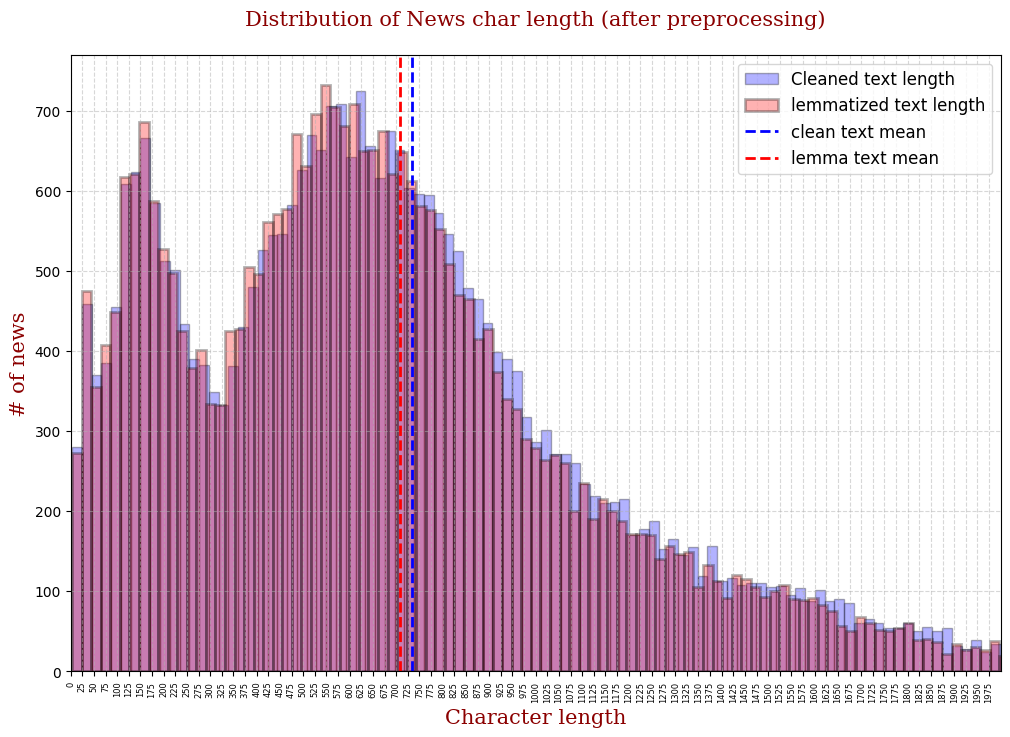

In [259]:
# Create a histogram plot to visualise character lengths
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 15,
        }

plt.figure(figsize=(12, 8))
plt.xlabel ("Character length", fontdict = font)
plt.xticks(np.arange(0,2000, 25), rotation = 90, size = 6)
plt.ylabel ("# of news", fontdict = font)
plt.xlim(right = 2000)   #to get rid of some outliers for better view of the distribution

plt.title('Distribution of News char length (after preprocessing)\n', fontdict = font)
# Plot the distributions

# Add histogram for cleaned news text
plt.hist(x = train_set['news_len'], bins = 500 ,color='blue', label='Cleaned text length',  edgecolor='black', alpha=0.3)
# Add histogram for lemmatized news text with POS tags removed
plt.hist(x = train_set['lemma_len'], bins = 500, color='red', label='lemmatized text length', edgecolor='black',alpha=0.3, linewidth=2)

# Plot mean lines
plt.axvline(np.mean(train_set['news_len']), color='blue', linestyle='--', linewidth=2, label= 'clean text mean')
plt.axvline(np.mean(train_set['lemma_len']), color='red', linestyle='--', linewidth=2, label='lemma text mean')


# Grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.show()

#Insight: As can be seen by reduction in mean,lemmatisation has reduced the overall length of text to a small extent(due to removal of all suffixes and such)
# The blue peaks are more prominent with char >750 shows that originally we had more news with larger char length but red peaks are dominant for char len <750 - it suggests lemmatization has shortened the text
# huge overlap across the graph, which suggests that many documents are only slightly shortened by lemmatization

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [260]:
from wordcloud import WordCloud

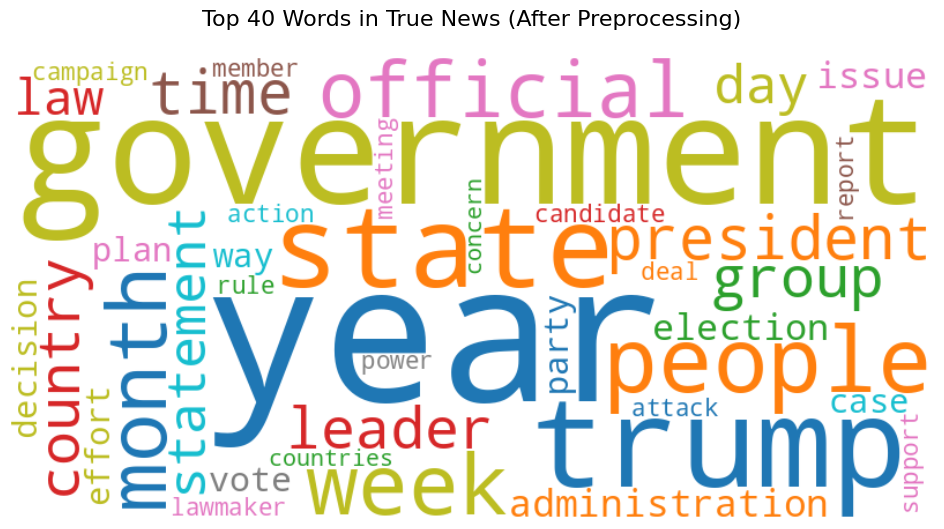

In [261]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
train_true = train_set[train_set["news_label"] ==1]['clean_text']

clean_true_all = " ".join([str(news) for news in train_true])
#len(clean_true_all)
# Generate word cloud for True News
wordcloud = WordCloud(width=800, height=400, max_words=40, background_color='white', colormap='tab10').generate(clean_true_all)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in True News (After Preprocessing)\n", fontsize=16)
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>


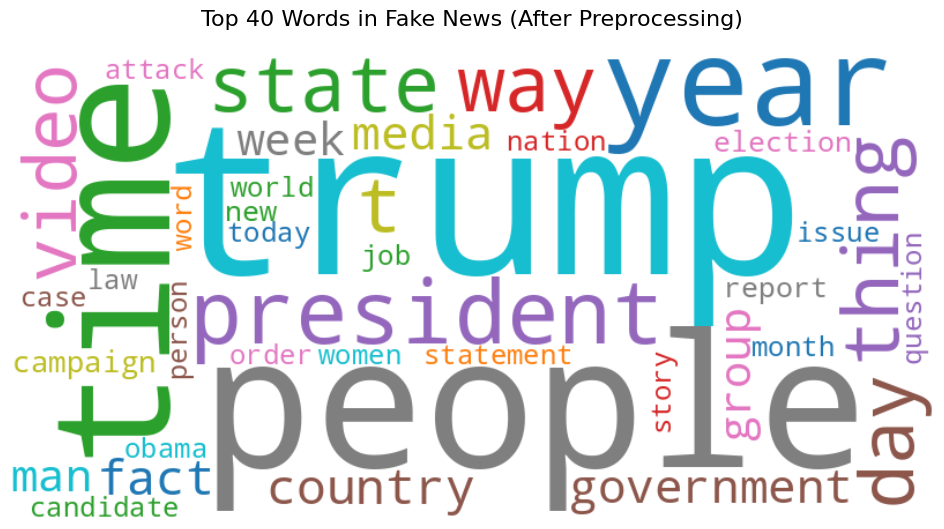

In [262]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
train_fake = train_set[train_set["news_label"] ==0]['clean_text']

clean_fake_all = " ".join([str(news) for news in train_fake])
#len(clean_true_all)
# Generate word cloud for fake News
wordcloud = WordCloud(width=800, height=400, max_words=40, background_color='white', colormap='tab10').generate(clean_fake_all)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in Fake News (After Preprocessing)\n", fontsize=16)
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




#### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [263]:
# Write a function to get the specified top n-grams

def get_top_ngrams(all_news, ngram_range, n):
    vec = CountVectorizer(ngram_range=ngram_range)
    X = vec.fit_transform(all_news)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

#### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [264]:
train_set.isna().sum()

news_label     0
news_text      0
clean_text    13
lemma_text    13
news_len       0
lemma_len      0
dtype: int64

In [265]:
# Handle NaN values in the text data
train_set.dropna(axis =0, inplace = True)

### For True News




#### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 unigrams in True news are [('trump', 25350), ('government', 13011), ('state', 11566), ('people', 10830), ('election', 8218), ('year', 7680), ('campaign', 7580), ('president', 6936), ('percent', 6858), ('security', 6512)]


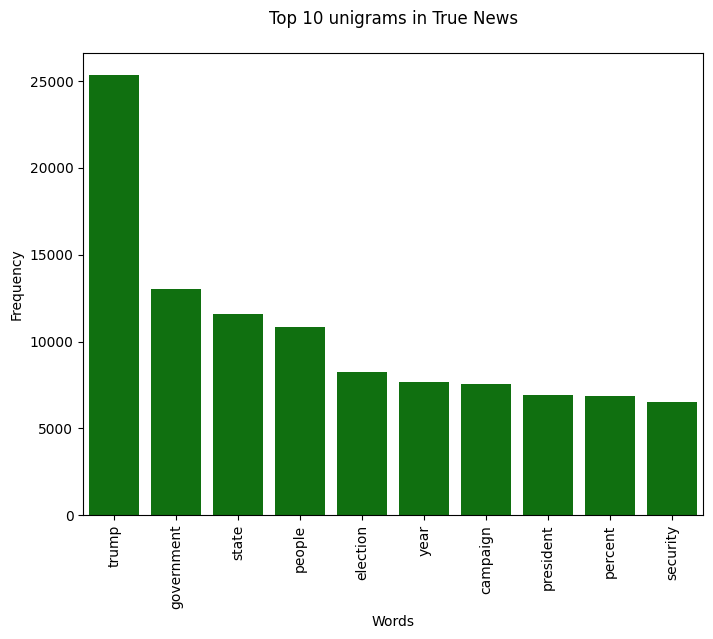

In [266]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
true_10_uni = get_top_ngrams(train_set[train_set["news_label"] ==1]['clean_text'], (1,1), 10)
print("Top 10 unigrams in True news are", true_10_uni)

true_uni_words =  [true[0] for true in true_10_uni]
true_uni_freq =  [true[1] for true in true_10_uni]

plt.figure( figsize = [8,6])
plt.title('Top 10 unigrams in True News\n')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
sns.barplot(x =true_uni_words, y = true_uni_freq , color = 'g')
plt.show()

#### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 bigrams in True news are [('trump campaign', 1241), ('news conference', 948), ('percent percent', 761), ('climate change', 711), ('security forces', 700), ('tax reform', 686), ('trump administration', 681), ('house representatives', 642), ('attorney general', 596), ('election campaign', 508)]


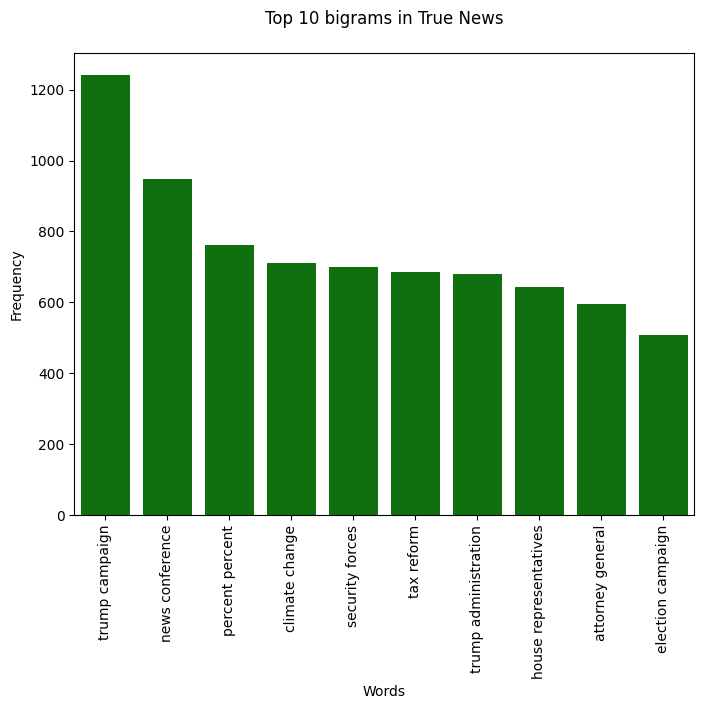

In [267]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
true_10_bi = get_top_ngrams(train_set[train_set["news_label"] ==1]['clean_text'], (2,2), 10)

print("Top 10 bigrams in True news are", true_10_bi)

true_bi_words =  [true[0] for true in true_10_bi]
true_bi_freq =  [true[1] for true in true_10_bi]

plt.figure( figsize = [8,6])
plt.title('Top 10 bigrams in True News\n')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
sns.barplot(x =true_bi_words, y = true_bi_freq , color = 'g')
plt.show()

#### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 trigrams in True news are [('trump transition team', 183), ('official condition anonymity', 177), ('tax rate percent', 153), ('circuit court appeals', 122), ('article staff involvement', 122), ('staff involvement creation', 122), ('involvement creation production', 122), ('percent percent percent', 111), ('trump travel ban', 111), ('use email server', 106)]


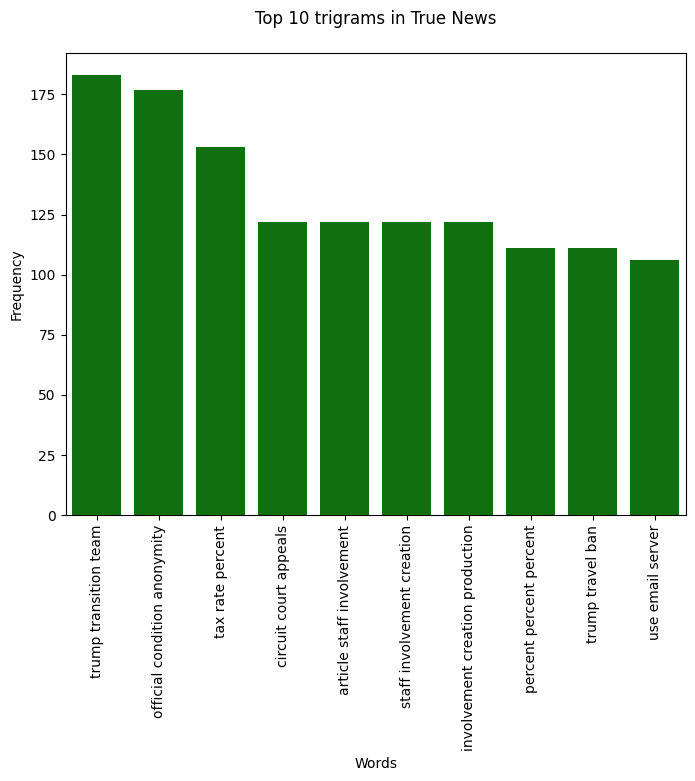

In [268]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
true_10_tri = get_top_ngrams(train_set[train_set["news_label"] ==1]['clean_text'], (3,3), 10)

print("Top 10 trigrams in True news are", true_10_tri)

true_tri_words =  [true[0] for true in true_10_tri]
true_tri_freq =  [true[1] for true in true_10_tri]

plt.figure( figsize = [8,6])
plt.title('Top 10 trigrams in True News\n')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
sns.barplot(x =true_tri_words, y = true_tri_freq , color = 'g')
plt.show()

### For Fake News







#### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 unigrams in fake news are [('trump', 35676), ('people', 18209), ('president', 9997), ('time', 8937), ('news', 7684), ('media', 7497), ('video', 7417), ('campaign', 7247), ('state', 6790), ('image', 6785)]


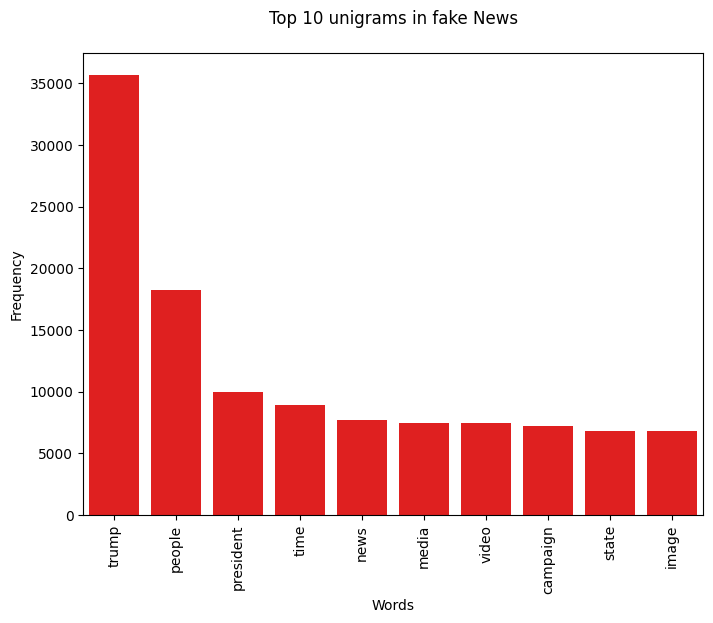

In [269]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
fake_10_uni = get_top_ngrams(train_set[train_set["news_label"] ==0]['clean_text'], (1,1), 10)
print("Top 10 unigrams in fake news are", fake_10_uni)

fake_uni_words =  [fake[0] for fake in fake_10_uni]
fake_uni_freq =  [fake[1] for fake in fake_10_uni]

plt.figure( figsize = [8,6])
plt.title('Top 10 unigrams in fake News\n')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
sns.barplot(x =fake_uni_words, y = fake_uni_freq , color = 'r')
plt.show()

#### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 bigrams in Fake news are [('century wire', 1302), ('image images', 1236), ('trump campaign', 1122), ('law enforcement', 1069), ('trump supporters', 1000), ('trump realdonaldtrump', 969), ('screen capture', 919), ('donald trump', 853), ('climate change', 811), ('mainstream media', 727)]


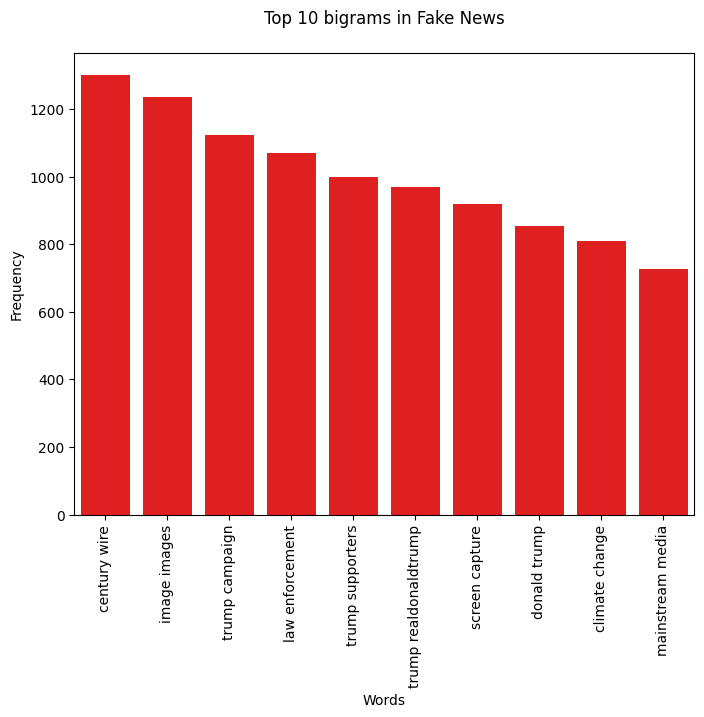

In [270]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
fake_10_bi = get_top_ngrams(train_set[train_set["news_label"] ==0]['clean_text'], (2,2), 10)

print("Top 10 bigrams in Fake news are", fake_10_bi)

fake_bi_words =  [fake[0] for fake in fake_10_bi]
fake_bi_freq =  [fake[1] for fake in fake_10_bi]

plt.figure( figsize = [8,6])
plt.title('Top 10 bigrams in Fake News\n')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
sns.barplot(x =fake_bi_words, y = fake_bi_freq , color = 'r')

plt.show()

#### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 trigrams in Fake news are [('news century wire', 604), ('video screen capture', 516), ('image video screen', 504), ('image getty images', 395), ('image screen capture', 306), ('image chip images', 179), ('century wire files', 166), ('image video screenshot', 162), ('broadcast boiler room', 156), ('tune radio network', 146)]


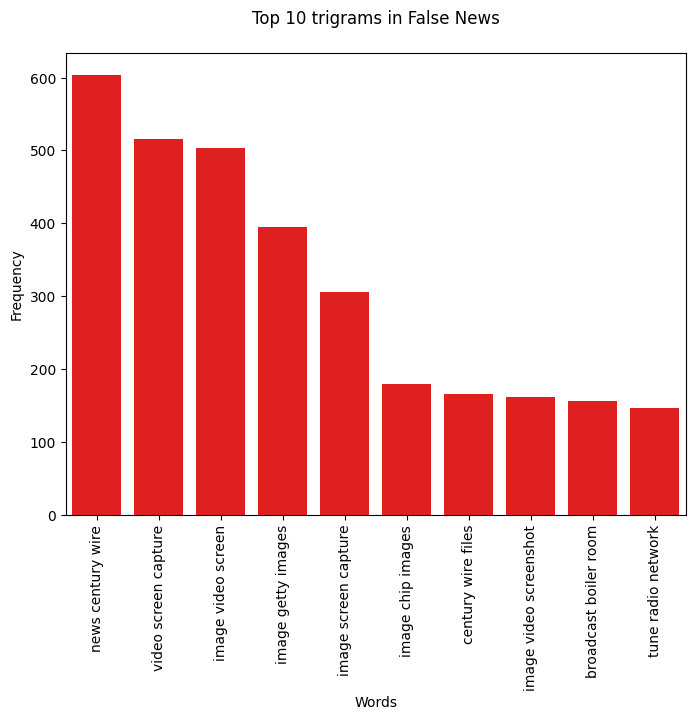

In [271]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
fake_10_tri = get_top_ngrams(train_set[train_set["news_label"] ==0]['clean_text'], (3,3), 10)

print("Top 10 trigrams in Fake news are", fake_10_tri)

fake_tri_words =  [fake[0] for fake in fake_10_tri]
fake_tri_freq =  [fake[1] for fake in fake_10_tri]

plt.figure( figsize = [8,6])
plt.title('Top 10 trigrams in False News\n')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
sns.barplot(x =fake_tri_words, y = fake_tri_freq , color = 'r')
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [272]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim
from gensim.models import Word2Vec
dataset = gensim.models.KeyedVectors.load_word2vec_format("D:/Navita/AIML/GoogleNews-vectors-negative300.bin.gz", binary= True, limit = 100000)
#dataset.word_vec('office')


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [273]:
train_set.head()

,news_label,news_text,clean_text,lemma_text,news_len,lemma_len
32218,0,fantastic trump budget director rips into repo...,trump budget director rips reporter things adm...,trump budget director rip reporter thing admin...,265,256
24542,0,trump just got ripped to shreds after blaming...,trump shreds democrats election hack tweets di...,trump shred democrat election hack tweet disda...,1979,1919
38058,0,global climate change liars ignore truth about...,climate change liars truth earth day founder g...,climate change liar truth earth day founder gi...,1481,1430
40508,0,will vile leftists turn democrats away…watch a...,leftists leftists prayer group prolife college...,leftist leftist prayer group prolife college s...,453,436
11158,1,noconfidence vote against pennsylvania approve...,noconfidence corruption probe city resolution ...,noconfidence corruption probe city resolution ...,702,688


In [274]:
def extract_vec_sentence(s):
    #print(s)
    s = str(s).split(" ")
    vec = []
    for word in s:
        if (dataset.has_index_for(word)):   # if the word
            vec.append(dataset.word_vec(word))
  
    if(len(vec)>0):       # handle cases when none of the words in dataset, highly unlikely
        return(np.mean(vec, axis = 0))
    else:
       # print(s)
        return(np.zeros((300,)))

In [275]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
X_train_set = [extract_vec_sentence(text) for text in train_set['clean_text']]
X_test_set = [extract_vec_sentence(text) for text in test_set['clean_text']]
## Extract the target variable for the training data and validation data
y_train_set = train_set['news_label']
y_test_set = test_set['news_label']

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [276]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [277]:
## Initialise Logistic Regression model
lr  = LogisticRegression(random_state = 42)
## Train Logistic Regression model on training data
lrp = lr.fit(np.array(X_train_set), y_train_set)
## Predict on validation data
y_test_pred =  lrp.predict(X_test_set)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [278]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("The accuracy score for logistic model is", accuracy_score( y_test_set, y_test_pred))
print("The precision score for logistic model is",  precision_score( y_test_set, y_test_pred))
print("The recall score for logistic model is",  recall_score( y_test_set, y_test_pred))
print("The f1 score for for logistic  model is",  f1_score( y_test_set, y_test_pred))

The accuracy score for logistic model is 0.9131403118040089
The precision score for logistic model is 0.9031763081172318
The recall score for logistic model is 0.9161089494163425
The f1 score for for logistic  model is 0.9095966620305981


In [279]:
# Classification Report
labels = ['True news', 'Fake news']
print(classification_report(y_test_set, y_test_pred, target_names = labels))

              precision    recall  f1-score   support

   True news       0.92      0.91      0.92      7045
   Fake news       0.90      0.92      0.91      6425

    accuracy                           0.91     13470
   macro avg       0.91      0.91      0.91     13470
weighted avg       0.91      0.91      0.91     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [292]:
## Initialise Decision Tree model

dt = DecisionTreeClassifier(random_state= 42, min_samples_leaf=2)

## Train Decision Tree model on training data
dt = dt.fit(X_train_set, y_train_set)
## Predict on validation data
y_test_pred = dt.predict(X_test_set)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [293]:
y_test_pred = dt.predict(X_test_set)

In [294]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("The accuracy score for Decision tree model is", accuracy_score( y_test_set, y_test_pred))
print("The precision score for Decision tree model is",  precision_score( y_test_set, y_test_pred))
print("The recall score for Decision tree model is",  recall_score( y_test_set, y_test_pred))
print("The f1 score for for Decision tree  model is",  f1_score( y_test_set, y_test_pred))

The accuracy score for Decision tree model is 0.8294729027468448
The precision score for Decision tree model is 0.8465413028878442
The recall score for Decision tree model is 0.7847470817120623
The f1 score for for Decision tree  model is 0.8144737904854212


In [295]:
# Classification Report
labels = ['True news', 'Fake news']
print(classification_report(y_test_set, y_test_pred, target_names = labels))

              precision    recall  f1-score   support

   True news       0.82      0.87      0.84      7045
   Fake news       0.85      0.78      0.81      6425

    accuracy                           0.83     13470
   macro avg       0.83      0.83      0.83     13470
weighted avg       0.83      0.83      0.83     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [288]:
## Initialise Decision Tree model

dt = RandomForestClassifier(random_state= 42, n_estimators=100)

## Train Decision Tree model on training data
dt = dt.fit(X_train_set, y_train_set)
## Predict on validation data
y_test_pred = dt.predict(X_test_set)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [291]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("The accuracy score for random forest model is", accuracy_score( y_test_set, y_test_pred))
print("The precision score for random forest model is",  precision_score( y_test_set, y_test_pred))
print("The recall score for random forest model is",  recall_score( y_test_set, y_test_pred))
print("The f1 score for for random forest  model is",  f1_score( y_test_set, y_test_pred))

The accuracy score for random forest model is 0.9126948775055679
The precision score for random forest model is 0.9142857142857143
The recall score for random forest model is 0.9014785992217899
The f1 score for for random forest  model is 0.9078369905956113


In [298]:
# Classification Report
labels = ['True news', 'Fake news']
print(classification_report(y_test_set, y_test_pred, target_names = labels))

              precision    recall  f1-score   support

   True news       0.82      0.87      0.84      7045
   Fake news       0.85      0.78      0.81      6425

    accuracy                           0.83     13470
   macro avg       0.83      0.83      0.83     13470
weighted avg       0.83      0.83      0.83     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

In [296]:
#Text preprocessing, including lemmatization and removal of stopwords & only using NN, NNP tagged words reduced data and significantly improved data quality by reducing noise and redundancy.
#clear patterns in language use in fake news vs true news (from section 4.3.5 & 4.3.8): 
    #- fake news often contained sensational words (images, video screen capture, cabin wires etc)
    # True news tended to use more formal vocabulary related to USA politics in this case.
# using semantic processing(pretrain Word2Vec GoogleNews-vectors-negative300 model ) provided a rich library of the embeddings to extract meaningful 300 dimensional vectors for all words  
# For each sentence, using average of all words helped exract a 300 dimensional data for each sentence 
# Among the models evaluated — including Logistic Regression, DecisionTree & Random Forest- logistic regression  using pretrained word embeddings using Word2Vec achieved the best performance, with a validation accuracy score of 0.913. 